In [1]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
pip install yfinance


You should consider upgrading via the 'C:\Users\Sherice\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install statsmodels

You should consider upgrading via the 'C:\Users\Sherice\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



In [5]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

In [6]:
name = 'VFIAX'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-12-22",end="2020-12-22")
x = df['Close']

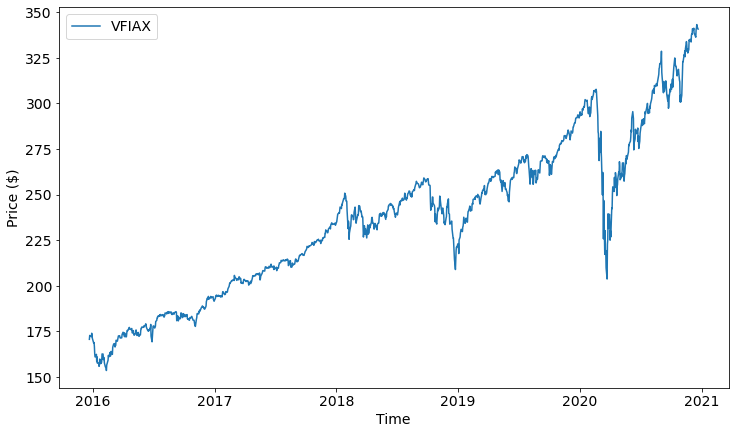

In [7]:
plt.plot(x,label="VFIAX")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.0,1259.000000,1259.0
mean,236.481023,236.481023,236.481023,236.481023,0.0,0.019233,0.0
std,43.333498,43.333498,43.333498,43.333498,0.0,0.152893,0.0
min,153.491074,153.491074,153.491074,153.491074,0.0,0.000000,0.0
25%,202.887344,202.887344,202.887344,202.887344,0.0,0.000000,0.0
50%,238.621185,238.621185,238.621185,238.621185,0.0,0.000000,0.0
75%,263.316742,263.316742,263.316742,263.316742,0.0,0.000000,0.0
max,343.289246,343.289246,343.289246,343.289246,0.0,1.456000,0.0


In [35]:
returns = x.pct_change(1).dropna()

In [10]:
returns[0:10]

Date
2015-12-23    0.012503
2015-12-24   -0.001577
2015-12-28   -0.002210
2015-12-29    0.010866
2015-12-30   -0.007149
2015-12-31   -0.009408
2016-01-04   -0.015068
2016-01-05    0.001993
2016-01-06   -0.012741
2016-01-07   -0.023688
Name: Close, dtype: float64

In [11]:
(x[1]-x[0])/x[0]

0.012503291634525526

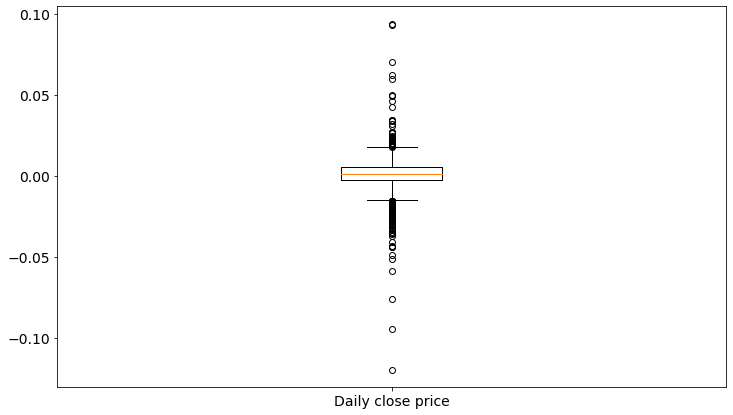

In [22]:
plt.boxplot(returns,labels=["Daily close price"])


plt.show()

In [12]:
returns.describe()

count    1258.000000
mean        0.000624
std         0.012130
min        -0.119766
25%        -0.002878
50%         0.000775
75%         0.005410
max         0.093983
Name: Close, dtype: float64

In [13]:
np.median(returns)

0.0007750217462083597

In [14]:
skew(returns)

-0.7223495985132673

In [15]:
skewtest(returns)

SkewtestResult(statistic=-9.49761987589704, pvalue=2.147422922360427e-21)

In [16]:
kurtosis(returns)


20.345277728745273

In [17]:
kurtosistest(returns)

KurtosistestResult(statistic=18.046876565196975, pvalue=8.348014634720489e-73)

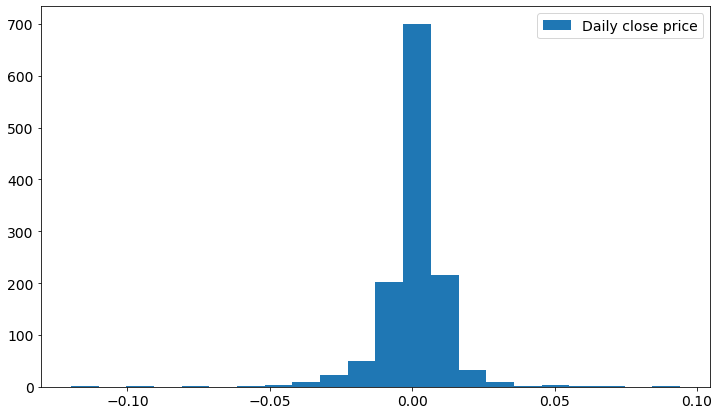

In [24]:
plt.hist(returns,bins="rice",label="Daily close price")

plt.legend()
plt.show()

In [25]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(returns,t)

q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

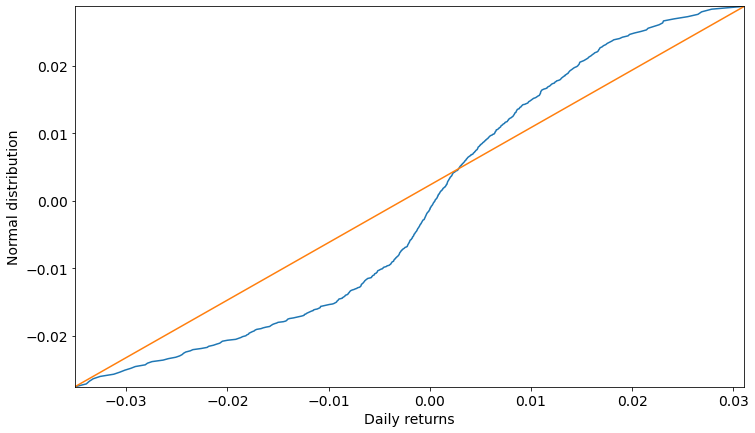

In [26]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

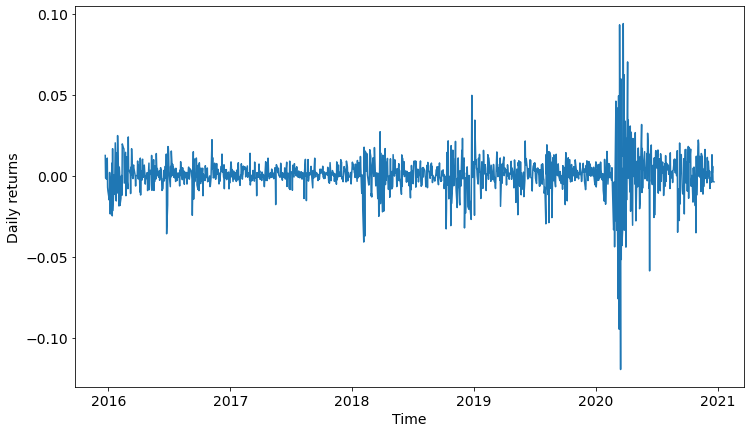

In [27]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()

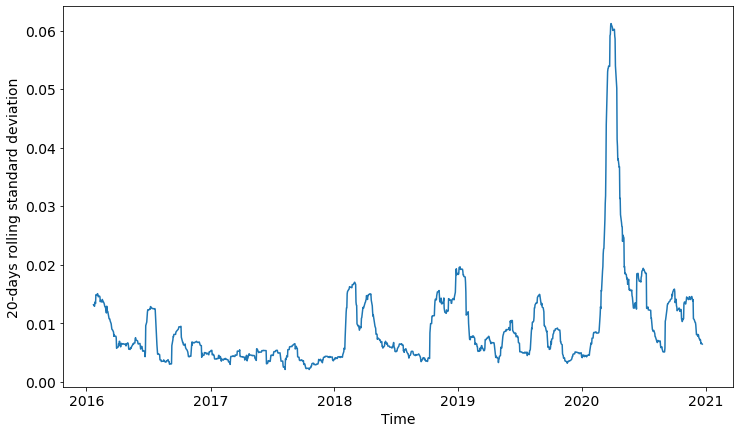

In [28]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

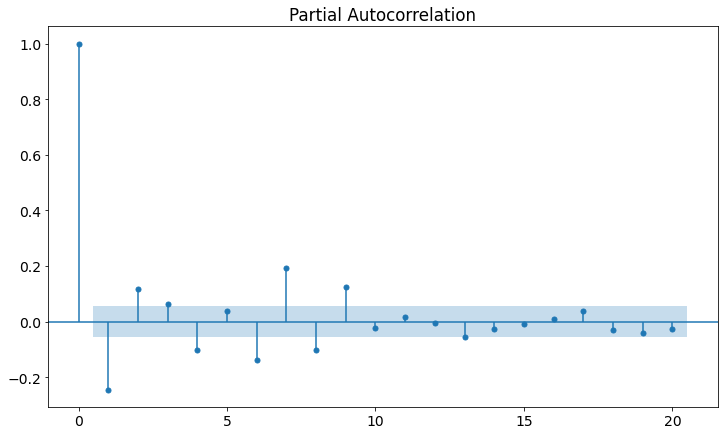

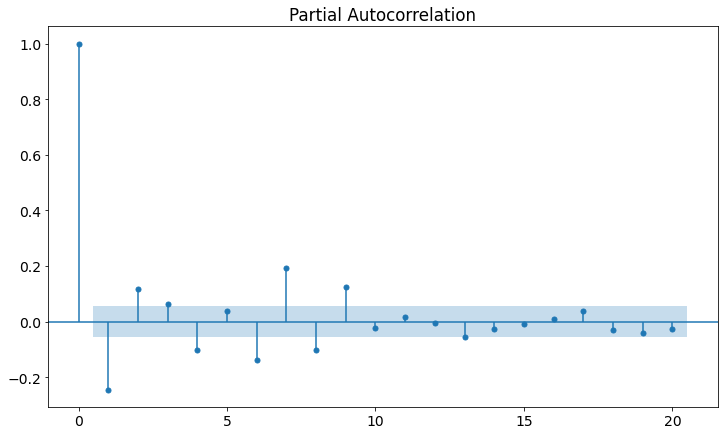

In [29]:
plot_pacf(returns,lags=20)

In [40]:
yf = yfinance
vfiax = yf.Ticker("VFIAX")

# get stock info
vfiax.info

# get historical market data
hist = vfiax.history(interval="3mo",start="2000-11-13",end="2020-12-22")

# show actions (dividends)
vfiax.actions

# show dividends
vfiax.dividends

Date
2001-06-22    0.297
2001-09-21    0.335
2002-03-22    0.310
2002-09-27    0.363
2002-12-27    0.432
              ...  
2019-06-26    1.389
2019-09-25    1.303
2019-12-20    1.433
2020-03-09    1.179
2020-12-21    1.386
Name: Dividends, Length: 77, dtype: float64

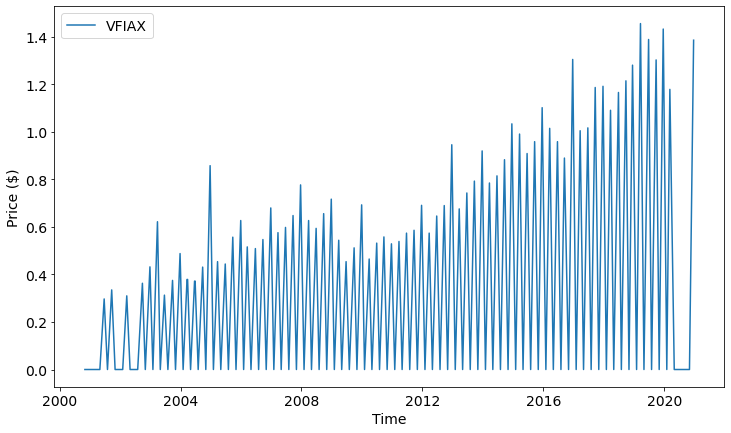

In [43]:
df = vfiax.history(interval="3mo",start="2000-11-13",end="2020-12-22")
x = df['Dividends']

plt.plot(x,label="VFIAX")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

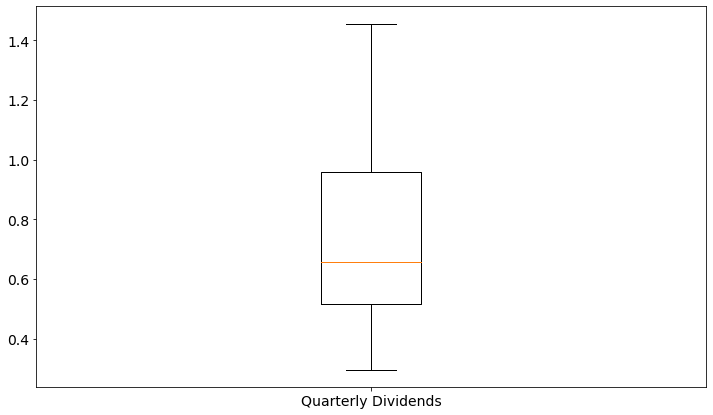

In [44]:
plt.boxplot(vfiax.dividends,labels=["Quarterly Dividends"])


plt.show()

In [45]:
vfiax.dividends.describe()

count    77.000000
mean      0.746299
std       0.312520
min       0.297000
25%       0.516000
50%       0.656000
75%       0.959000
max       1.456000
Name: Dividends, dtype: float64

In [46]:
np.median(vfiax.dividends)

0.656

In [47]:
skew(vfiax.dividends)

0.6150803216040809

In [48]:
skewtest(vfiax.dividends)

SkewtestResult(statistic=2.235626156019446, pvalue=0.025376269787222936)

In [49]:
kurtosis(vfiax.dividends)

-0.6502270561352668

In [50]:
kurtosistest(vfiax.dividends)

KurtosistestResult(statistic=-1.4014659717312683, pvalue=0.16107477633785683)

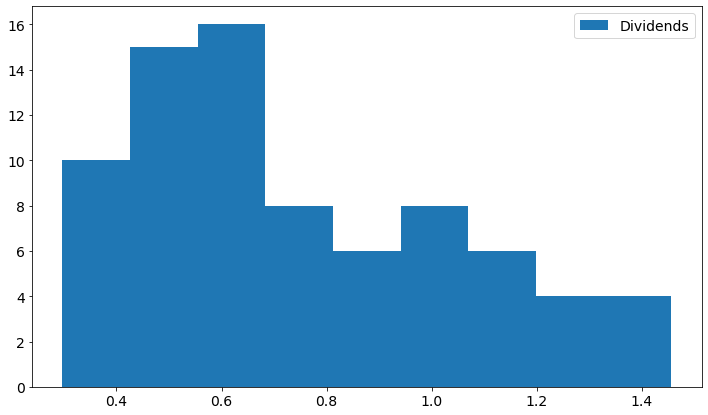

In [51]:
plt.hist(vfiax.dividends,bins="rice",label="Dividends")

plt.legend()
plt.show()

In [52]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(vfiax.dividends,t)

q2 = norm.ppf(t,loc=np.mean(vfiax.dividends),scale=np.std(vfiax.dividends))

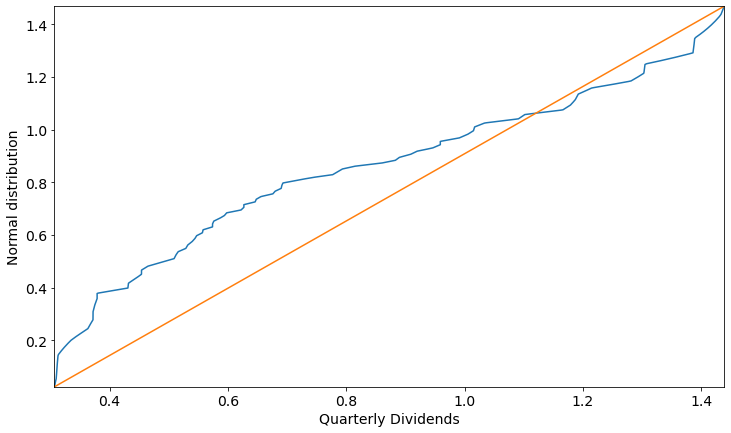

In [53]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Quarterly Dividends")
plt.ylabel("Normal distribution")
plt.show()

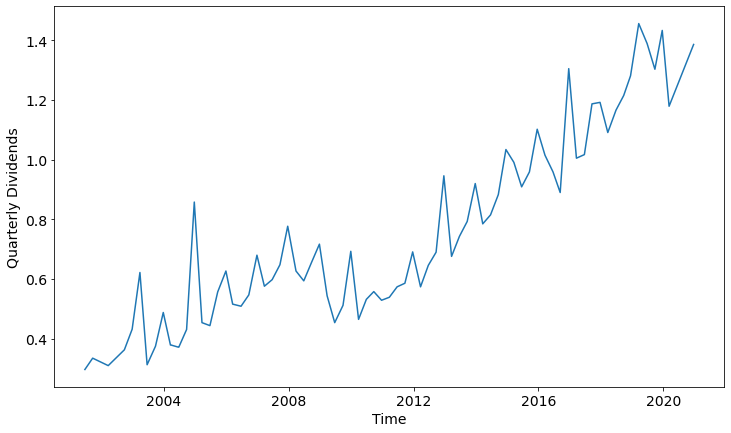

In [54]:
plt.plot(vfiax.dividends)
plt.xlabel("Time")
plt.ylabel("Quarterly Dividends")

plt.show()

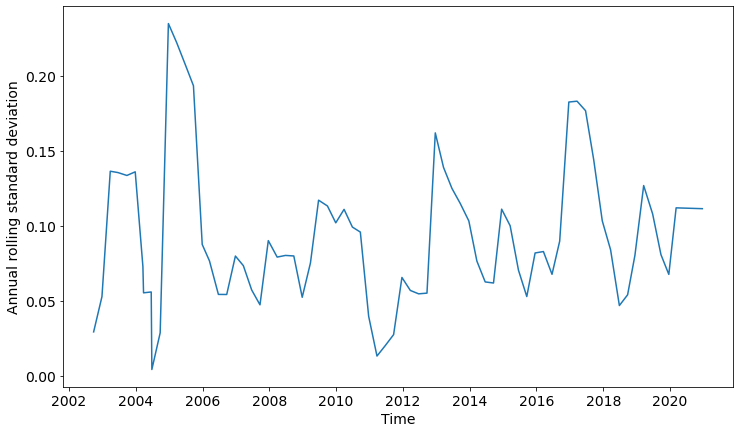

In [62]:
plt.plot(vfiax.dividends.rolling(4).std())
plt.xlabel("Time")
plt.ylabel("Annual rolling standard deviation")
plt.show()

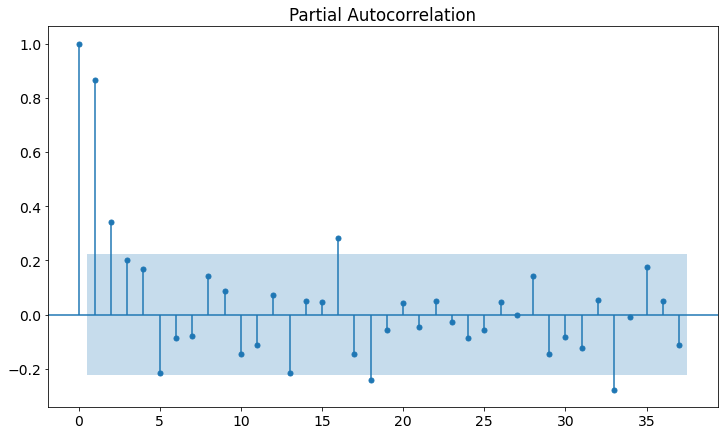

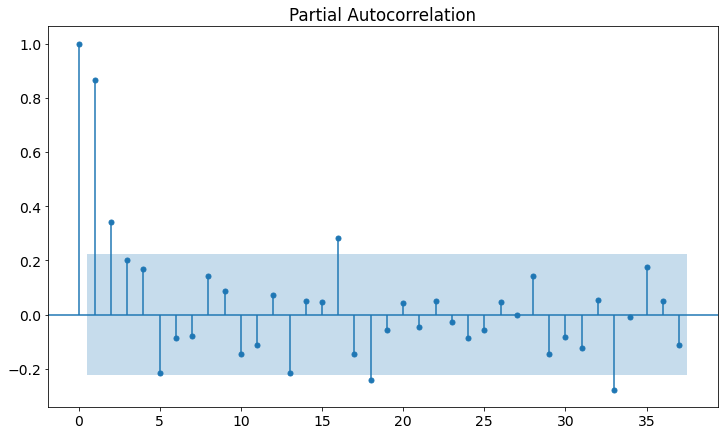

In [65]:
plot_pacf(vfiax.dividends,lags=37)

In [79]:
from statsmodels.tsa.stattools import adfuller


In [80]:
result = adfuller(df['Dividends'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.808499415318886
p-value: 0.3762502092477108
Critical Values:
	1%: -3.474714913481481
	5%: -2.881008708148148
	10%: -2.5771508444444446
